In [1]:
from sysbiojax import Model
from jax import config

In [2]:
config.update("jax_enable_x64", True)

### Defining a simple Michaelis-Menten model

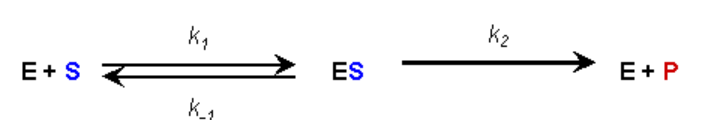

In [3]:
# Initialize the model
model = Model(name="Simple menten model")

# Add species
model.add_species("s1, s2")

# Add ODEs
model.add_ode("s1", "- (v_max * s1) / ( K_m + s1)")
model.add_ode("s2", "(v_max * s1) / ( K_m + s1)")

# Add parameter values
model.parameters.v_max.value = 5.0
model.parameters.K_m.value = 100.0

In [4]:
model

# Species



Eq(x, Matrix([[s1, s2]]))


# Parameters



Eq(theta, Matrix([[v_max, K_m]]))


# Equations



Eq(Derivative(s1, t), -s1*v_max/(K_m + s1))

Eq(Derivative(s2, t), s1*v_max/(K_m + s1))

In [5]:
model.parameters

,Name,Value
0,v_max,5.0
1,K_m,100.0


In [69]:
initial_conditions = [
    {"s1": 10.0, "s2": 0.0},
    {"s1": 20.0, "s2": 0.0},
    {"s1": 30.0, "s2": 0.0},
    {"s1": 50.0, "s2": 0.0},
    {"s1": 70.0, "s2": 0.0},
    {"s1": 90.0, "s2": 0.0},
    {"s1": 100.0, "s2": 0.0},
    {"s1": 120.0, "s2": 0.0},
    {"s1": 130.0, "s2": 0.0},
    {"s1": 150.0, "s2": 0.0},
    {"s1": 200.0, "s2": 0.0},
]

In [72]:
%%timeit
time, states = model.simulate(
    initial_conditions=initial_conditions,
    t0=0, t1=100, dt0=0.01, nsteps=100
)

957 µs ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


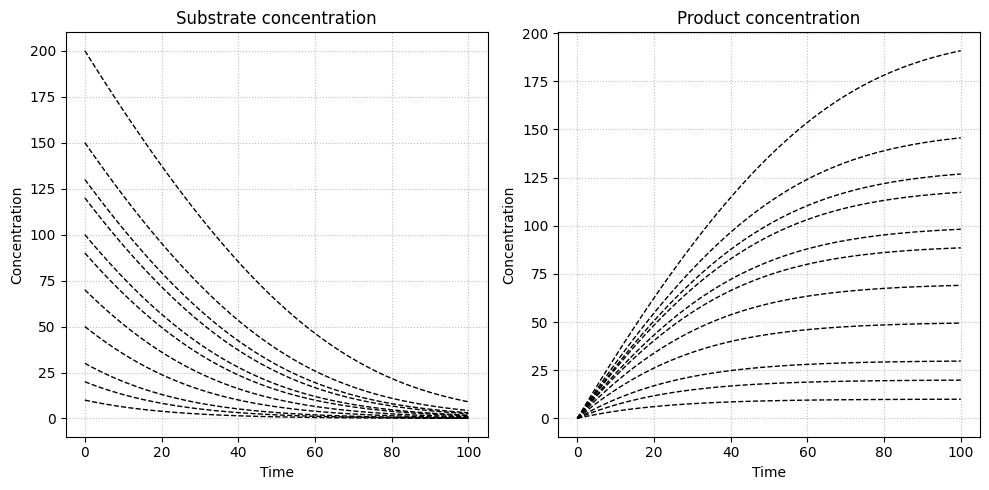

In [73]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = ax[0].plot(time.T, states[:, :, 0].T, c="k", linewidth=1, linestyle="--")
_ = ax[1].plot(time.T, states[:, :, 1].T, c="k", linewidth=1, linestyle="--")

# Plot grids
ax[0].grid(alpha=0.8, linestyle=":")
ax[1].grid(alpha=0.8, linestyle=":")

# Axis labels
ax[0].set_xlabel("Time")
ax[1].set_xlabel("Time")
ax[0].set_ylabel("Concentration")
ax[1].set_ylabel("Concentration")

# Plot title
ax[0].set_title("Substrate concentration")
ax[1].set_title("Product concentration")

plt.tight_layout()

## Next steps

* ✅ Integrate `diffrax` generalized inetgration interface to simulate a given equation
  * See the following [colab notebook](https://colab.research.google.com/drive/1TRAaZe0YV7WQR127s05GcFijXJ6wPZm4?usp=sharing) for a first implementation
* ✅ Vmap for multiple initial conditions
* Plotting routine based on model
* Symbolic elimination
* Add NumPyro support for Bayes analysis
* Add symbolic identifiability analysis (Daisy)
  * Input-Output relation by using polynomials
  * Gröbner basis for global-, local or non-identifiability
* Add Neural ODE support